# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

# 2. Importing Data

In [3]:
# Defining Path
path=r'/Users/guillaumemac/Achievement 6'

In [4]:
citibike=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','citibike_clean.csv'),index_col=False)

In [5]:
citibike.head()

,Unnamed: 0,day_of_the_week,start_hour,ride_start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,ride_end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female
1,1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male
2,2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male
3,3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female
4,5,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986,Female


# 3. Data Cleaning & Wrangling

In [6]:
# Converting the columns to datetime
citibike['ride_start_time']=pd.to_datetime(citibike['ride_start_time'])
citibike['ride_end_time']=pd.to_datetime(citibike['ride_end_time'])

In [7]:
#Separating the date from time and renaming the columns
citibike['ride_start_date']=citibike['ride_start_time'].dt.date
citibike['ride_start_time']=citibike['ride_start_time'].dt.time
citibike['ride_end_date'] = citibike['ride_end_time'].dt.date
citibike['ride_end_time'] = citibike['ride_end_time'].dt.time

In [8]:
citibike.head()

,Unnamed: 0,day_of_the_week,start_hour,ride_start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,ride_end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start_date,ride_end_date
0,0,Mon,18,18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,2013-09-09,2013-09-09
1,1,Thu,18,18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,2013-09-12,2013-09-12
2,2,Wed,19,19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,2013-09-18,2013-09-18
3,3,Sat,11,11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,2013-09-28,2013-09-28
4,5,Fri,22,22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986,Female,2013-09-27,2013-09-27


In [9]:
# Defining the new order of columns
new_order = ['Unnamed: 0', 'day_of_the_week', 'start_hour','ride_start_date','ride_start_time','start_station_id',
            'start_station_name','start_station_latitude','start_station_longitude','ride_end_date',
            'ride_end_time','end_station_id','end_station_name','end_station_latitude','end_station_longitude',
            'trip_duration','subscriber','birth_year','gender'] 
citibike = citibike[new_order]

In [10]:
citibike.head()

,Unnamed: 0,day_of_the_week,start_hour,ride_start_date,ride_start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,ride_end_date,ride_end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,Mon,18,2013-09-09,18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09,18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female
1,1,Thu,18,2013-09-12,18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12,18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male
2,2,Wed,19,2013-09-18,19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18,19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male
3,3,Sat,11,2013-09-28,11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28,12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female
4,5,Fri,22,2013-09-27,22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27,22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986,Female


In [11]:
# Changine the format of the "trip_duration" column to miniutes and renaming it 'trip_duration_min'
citibike['trip_duration_min'] = (citibike['trip_duration'] / 60).round(2).astype(str)

In [12]:
citibike.head()

,Unnamed: 0,day_of_the_week,start_hour,ride_start_date,ride_start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,ride_end_date,ride_end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_min
0,0,Mon,18,2013-09-09,18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09,18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,16.55
1,1,Thu,18,2013-09-12,18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12,18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,9.68
2,2,Wed,19,2013-09-18,19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18,19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,6.02
3,3,Sat,11,2013-09-28,11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28,12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,9.35
4,5,Fri,22,2013-09-27,22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27,22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986,Female,7.12


In [13]:
citibike.describe()

,Unnamed: 0,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year
count,43021.000000,43021.000000,43021.000000,43021.000000,43021.000000,43021.00000,43021.000000,43021.000000,43021.00000,43021.000000
mean,24964.010599,14.084563,437.226610,40.734477,-73.990952,434.59815,40.734069,-73.991245,770.62337,1975.627786
std,14449.244268,4.932676,340.831639,0.019598,0.012370,332.88413,0.019602,0.012375,523.46211,11.089001
min,0.000000,0.000000,72.000000,40.680342,-74.017134,72.00000,40.680342,-74.017134,60.00000,1899.000000
25%,12439.000000,10.000000,304.000000,40.721101,-74.000040,305.00000,40.720828,-74.000271,395.00000,1968.000000
50%,24953.000000,15.000000,402.000000,40.736245,-73.990765,402.00000,40.735877,-73.990985,621.00000,1978.000000
75%,37488.000000,18.000000,485.000000,40.749718,-73.981948,483.00000,40.749013,-73.982578,999.00000,1984.000000
max,49999.000000,23.000000,3002.000000,40.770513,-73.950048,3002.00000,40.770513,-73.950048,2697.00000,1997.000000


In [14]:
day_counts = citibike.groupby('day_of_the_week')['ride_start_date'].count().reset_index()

In [15]:
day_counts

,day_of_the_week,ride_start_date
0,Fri,6596
1,Mon,6800
2,Sat,4966
3,Sun,5510
4,Thu,6222
5,Tue,6433
6,Wed,6494


In [16]:
# Getting amount of rides taken on each hour of each day
hour_counts= citibike.groupby(['start_hour',citibike['ride_start_date']])['ride_start_date'].count()

In [17]:
hour_counts

start_hour  ride_start_date
0           2013-09-01         15
            2013-09-02         15
            2013-09-03          5
            2013-09-04          9
            2013-09-05         13
                               ..
23          2013-09-26         38
            2013-09-27         44
            2013-09-28         48
            2013-09-29         21
            2013-09-30         17
Name: ride_start_date, Length: 711, dtype: int64

In [18]:
ride_counts = citibike['gender'].value_counts()
print(ride_counts)

gender
Male      32361
Female    10658
Unkown        2
Name: count, dtype: int64


In [19]:
# Getting the average rides per hour
avg_rides_per_hour=hour_counts.groupby('start_hour').mean().reset_index()

In [20]:
avg_rides_per_hour

,start_hour,ride_start_date
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.200000
8,8,104.266667
9,9,86.600000


# 4. Exploring Data

# Checking for outliers and Extreme Values

/var/folders/wm/drxqc4897cz5y2338pz0stxm0000gn/T/ipykernel_1408/3076514825.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(citibike['trip_duration_min'], bins=60)


<Axes: xlabel='trip_duration_min', ylabel='Density'>

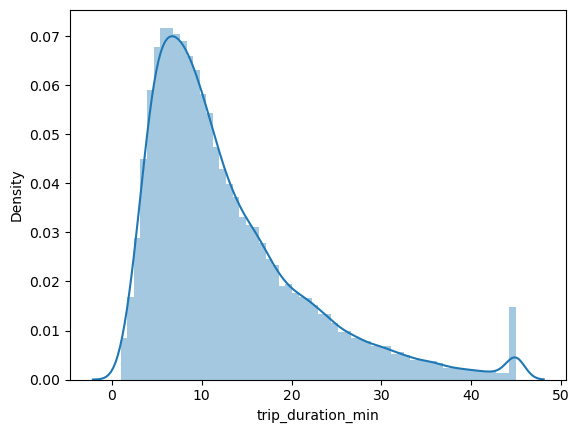

In [21]:
sns.distplot(citibike['trip_duration_min'], bins=60)

In [22]:
# Converting the 'trip_duration_min' column to int64
citibike['trip_duration_min'] = pd.to_numeric(citibike['trip_duration_min'], errors='coerce')

# Checking the data types to verify the conversion
print(citibike.dtypes)

Unnamed: 0                   int64
day_of_the_week             object
start_hour                   int64
ride_start_date             object
ride_start_time             object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
ride_end_date               object
ride_end_time               object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                   int64
gender                      object
trip_duration_min          float64
dtype: object


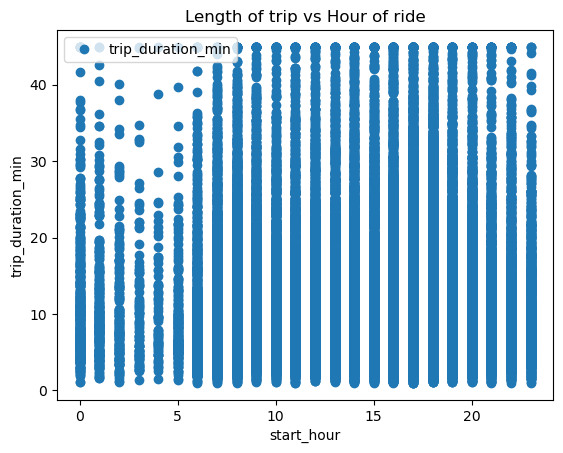

In [23]:
# Creating a scatterplot to look at how the chosen variables plot against each other.

citibike.plot(x = 'start_hour', y='trip_duration_min',style='o')
plt.title('Length of trip vs Hour of ride')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration_min')  
plt.show()

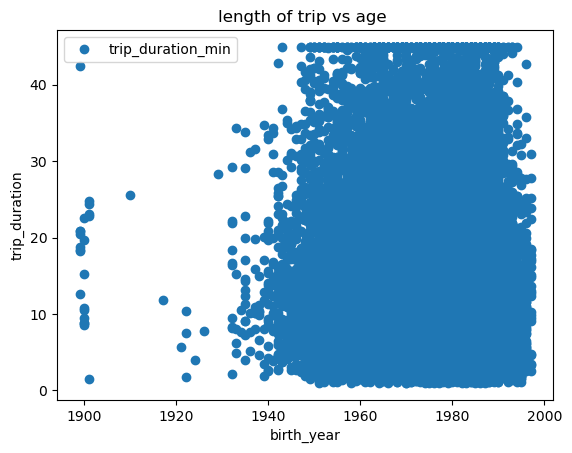

In [24]:
# Creating a scatterplot to at how the chosen variables plot against each other.

citibike.plot(x = 'birth_year', y='trip_duration_min',style='o')
plt.title('length of trip vs age ')  
plt.xlabel('birth_year')  
plt.ylabel('trip_duration')  
plt.show()

### The birth year 1900 looks more like it is an extreme value but eliminating these values would present bias in my analysis because it has a human factor in it. I will leave it untouched for the moment

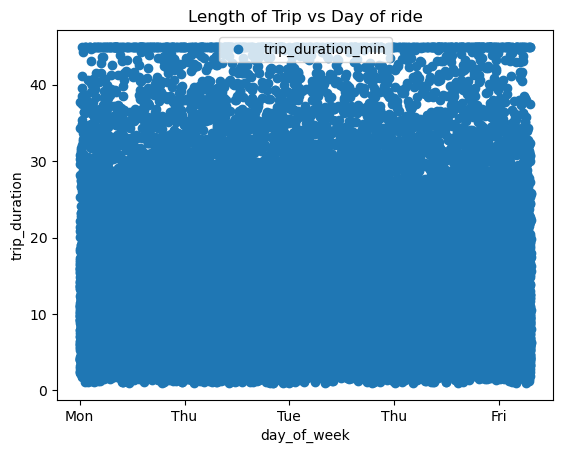

In [25]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

citibike.plot(x = 'day_of_the_week', y='trip_duration_min',style='o')
plt.title('Length of Trip vs Day of ride')  
plt.xlabel('day_of_week')  
plt.ylabel('trip_duration')  
plt.show()

# 5. Hypothesis

## Young riders, have longer Trip durations.

# 6. Reshaping Variables into NumPy arrays

In [26]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.
X = citibike['birth_year'].values.reshape(-1,1)
y = citibike['trip_duration_min'].values.reshape(-1,1)

In [27]:
X

array([[1968],
       [1983],
       [1989],
       ...,
       [1970],
       [1961],
       [1980]])

In [28]:
y

array([[16.55],
       [ 9.68],
       [ 6.02],
       ...,
       [19.85],
       [17.5 ],
       [ 6.17]])

# 7. Spliting the data into two sets: a training set and a test set.

In [29]:
# Spliting the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 8. Regression Analyisis

In [30]:
# Creating a regression object.

regression = LinearRegression()

In [31]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

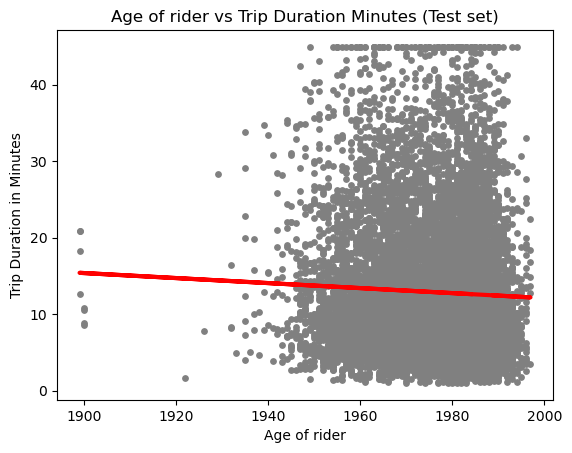

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age of rider vs Trip Duration Minutes (Test set)')
plot_test.xlabel('Age of rider')
plot_test.ylabel('Trip Duration in Minutes')
plot_test.show()

###  The regression negative slope. I believe it indicates a negative relationsip. The red regression line doesn’t perfectly cover all of the data points. In the area where the distance to metro There are still many data points that indicates low trip durataion in the areas where a rider is younger, this goes against my hypothesis.

In [34]:
# Creating objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [35]:
# Printing the model summary statistics to evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.03277129]]
Mean squared error:  74.95786441524484
R2 score:  0.0029728287660281127


In [36]:
# Creating a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.68,12.616719
1,27.95,13.239373
2,4.35,13.403229
3,5.93,12.747804
4,28.48,12.518405
5,10.00,13.403229
6,15.67,13.599857
7,1.52,12.551176
8,9.17,13.501543
9,6.35,13.403229


# Thougts on the model perfomance

###### The regression line passes fairly at a far to the observations. I can conclude that a regression may not be the best model to represent this data and can’t accurately predict the influence of birth_year(Age of rider)  on the trip duration in minutes. With an R2 percentage value of  0.0826, it indicates that my model isn’t a great of a fit either. We confirmed this by  making dataframe of y values and their predicted values and it further confirmed the big difference in actual and predicted values. This simply confirms the fact that my model isn’t doing a great job of explaining the relationship between the  birth_year(Age of rider)  and  the trip duration in minutes.

## There is a possibility of bias in the way rides and riders ages are are recorded accurately. I could have been a typo for the birth_year of even a ride that never logged out making the trip duration appear longer that the actually did. There is also possibility of rides data not registering accurately.